# Tarea - escalamiento y transformación
En el archivo `Escalamiento.xlsx` se encuentran dos variables, las cuales se pretenden analizar para una posterior predicción.

Se entrenará una red neuronal con la variable $x_1$ usando una función de activación sigmoidal unipolar, y la variable $x_2$ se usará para entrenar una red neuronal con una función de activación de tangente hiperbólica.

1. Transforme cada variable usando una función de potencia, con el fin de maximizar la probabilidad de obtener una distribución Normal.

2. Use el escalamiento adecuado para cada variable con la finalidad de que la red neuronal opere en el rango de cada función de activación.

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [24]:
file_path = 'Escalamiento.xlsx'
df = pd.read_excel(file_path, sheet_name='Hoja1')

seed = 6

df.head(10)

,x1,x2
0,6050000.0,5390000.0
1,4720000.0,700000.0
2,4460000.0,10140000.0
3,34740000.0,6600000.0
4,1910000.0,3390000.0
5,7640000.0,6850000.0
6,17660000.0,7530000.0
7,13020000.0,7740000.0
8,13900000.0,7575000.0
9,7590000.0,7410000.0


In [25]:
# transformación de potencia (ponemos 0.5 por defecto por normalidad)
def black_box(variable, meth=0, corderita=0.5):
    if meth == 0:
        return np.power(variable, corderita)
    elif meth == 1:
        if np.any(variable <= 0):
            raise ValueError("No todos los valores son mayores a cero.")
        return stats.boxcox(variable)[0]  # Regresa solo los valores transformados
    elif meth == 2:
        return stats.yeojohnson(variable)[0]  # Regresa solo los valores transformados
    else:
        raise ValueError("Elige del 0 al 2 we no es tan difícil")
    
x1_transformed = black_box(df['x1'], meth=2, corderita=0.5)
x2_transformed = black_box(df['x2'], meth=2, corderita=0.5)

In [26]:
# escalamiento para cada función de activación
scaler_sigmoid = MinMaxScaler(feature_range=(0, 1))  # sigmoidal unipolar
x1_scaled = scaler_sigmoid.fit_transform(x1_transformed.reshape(-1, 1))

scaler_tanh = MinMaxScaler(feature_range=(-1, 1))  # tangente hiperbólica
x2_scaled = scaler_tanh.fit_transform(x2_transformed.reshape(-1, 1))

# df con los datos transformados y escalados
df_scaled = pd.DataFrame({
    'x1_transformed': x1_transformed,
    'x1_scaled': x1_scaled.flatten(),
    'x2_transformed': x2_transformed,
    'x2_scaled': x2_scaled.flatten()
})

In [27]:
print(df_scaled)

      x1_transformed  x1_scaled  x2_transformed  x2_scaled
0          33.695933   0.475982       67.198902  -0.264235
1          32.718357   0.448384       46.894075  -0.587659
2          32.498230   0.442170       74.936432  -0.140989
3          41.221441   0.688433       69.594824  -0.226072
4          29.332053   0.352786       61.993961  -0.347142
...              ...        ...             ...        ...
3282       36.895487   0.566308       71.645598  -0.193406
3283       35.070168   0.514778       79.941313  -0.061269
3284       36.151599   0.545307       72.549905  -0.179002
3285       39.002903   0.625802       56.567471  -0.433577
3286       32.201340   0.433789       80.351692  -0.054732

[3287 rows x 4 columns]


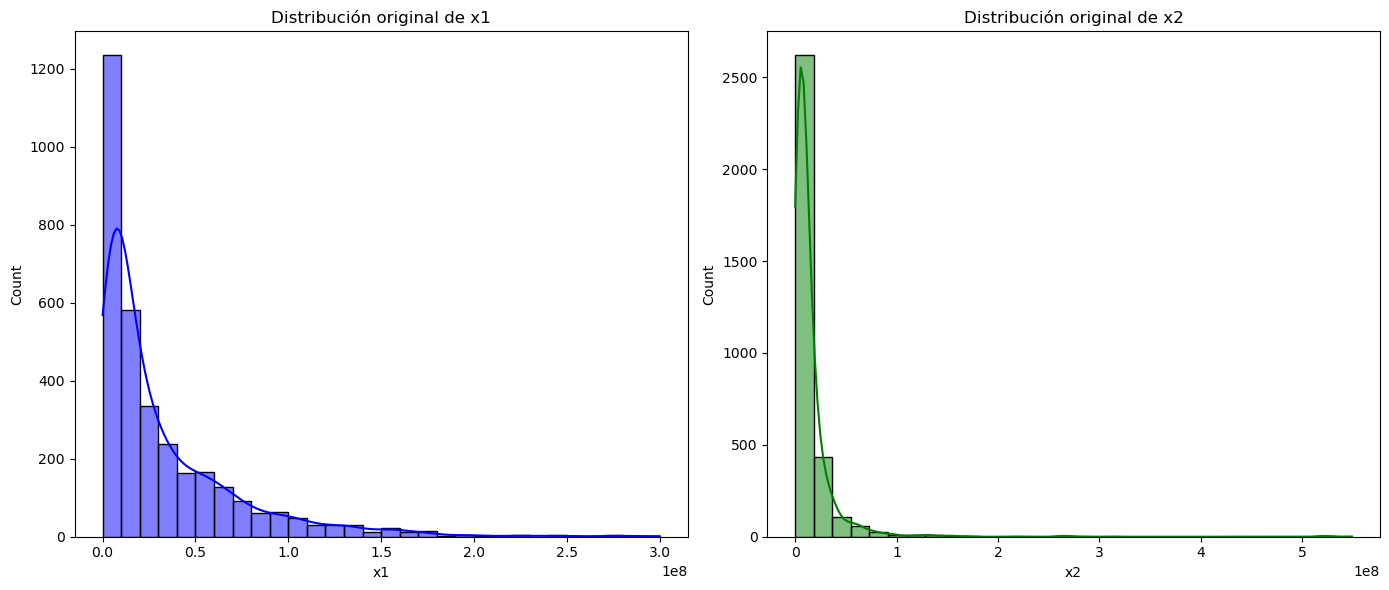

In [28]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['x1'], kde=True, color='blue', bins=30)
plt.title('Distribución original de x1')

plt.subplot(1, 2, 2)
sns.histplot(df['x2'], kde=True, color='green', bins=30)
plt.title('Distribución original de x2')

plt.tight_layout()
plt.show()

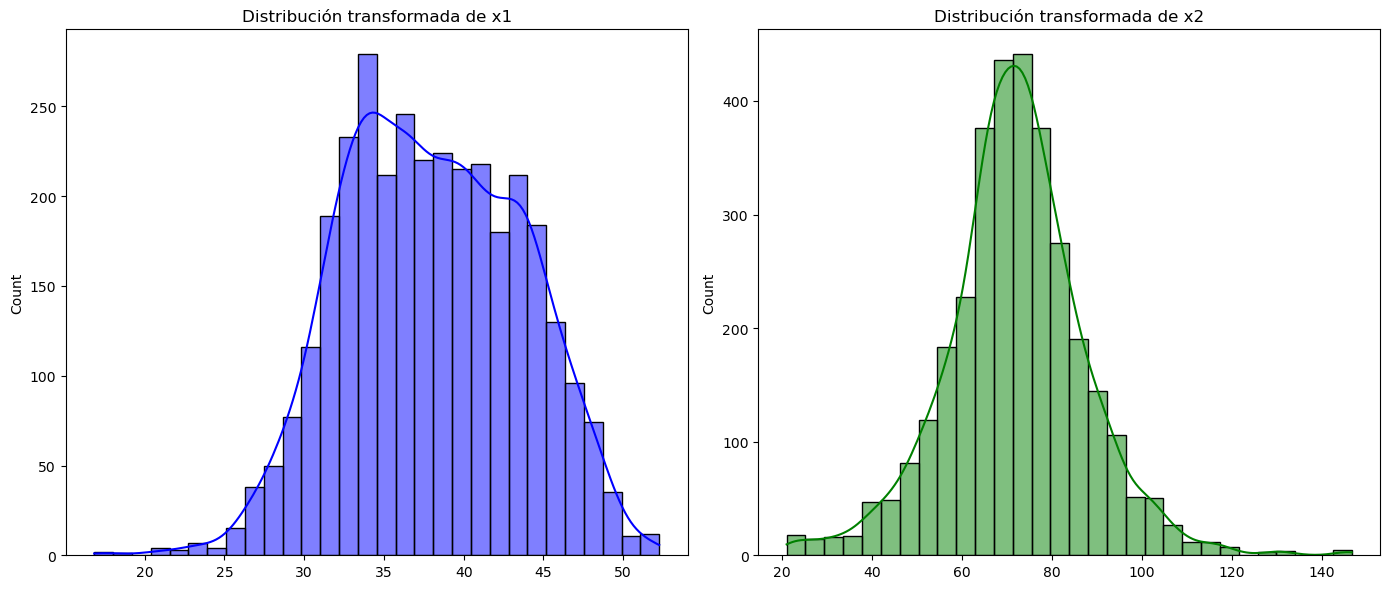

In [29]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(x1_transformed, kde=True, color='blue', bins=30)
plt.title('Distribución transformada de x1')

plt.subplot(1, 2, 2)
sns.histplot(x2_transformed, kde=True, color='green', bins=30)
plt.title('Distribución transformada de x2')

plt.tight_layout()
plt.show()

In [30]:
x1_train, x1_test = train_test_split(x1_scaled, test_size=0.2, random_state=seed)
x2_train, x2_test = train_test_split(x2_scaled, test_size=0.2, random_state=seed)

model_x1 = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', max_iter=100, random_state=seed)
model_x2 = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', max_iter=100, random_state=seed)

model_x1.fit(x1_train, x1_train)
model_x2.fit(x2_train, x2_train)

score_x1 = model_x1.score(x1_test, x1_test)
score_x2 = model_x2.score(x2_test, x2_test)

print(f"Score de la red neuronal para x1: {score_x1}")
print(f"Score de la red neuronal para x2: {score_x2}")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score de la red neuronal para x1: 0.9949144038371855
Score de la red neuronal para x2: 0.9999399915350313


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
